In [1]:
import pandas as pd
import numpy as np
from texttable import Texttable
import matplotlib.pyplot as plotting
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

breast_cancer = pd.read_csv("data.csv")
breast_cancer = breast_cancer.drop(['Unnamed: 32'],axis=1)
print(breast_cancer.head())
print("\n")


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

In [3]:
#IMPORTING DATA

data_mean = breast_cancer[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

predictors = data_mean.columns[2:11]
crux = "diagnosis"

X = data_mean.loc[:,predictors]
Y = np.ravel(breast_cancer.loc[:,[crux]])


In [4]:
#RANDOM FOREST BEFORE NORMALIZATION AND PCA - > BENCHMARK

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score, cross_val_predict

rf = RandomForestClassifier()
sc = cross_val_score(rf, X, Y, scoring='accuracy' ,cv=10).mean()
print("Benchmark-> Accuracy before Norm and PCA:- %s"%round(sc*100,2))

print('Here we use 10 cross-validation approach')

Benchmark-> Accuracy before Norm and PCA:- 94.2
Here we use 10 cross-validation approach


In [5]:
#CHECKING FOR NULL VALUES

full_headers = breast_cancer.columns
values = list(breast_cancer.isnull().sum())
nullList=[]
nullList.append(['Feature','Null Values count'])
for i in range(len(full_headers)):
    nullList.append([full_headers[i],values[i]])

table = Texttable()
table.add_rows(nullList)
print(table.draw())    
print("\n")

+-------------------------+-------------------+
|         Feature         | Null Values count |
+=========================+===================+
| id                      | 0                 |
+-------------------------+-------------------+
| diagnosis               | 0                 |
+-------------------------+-------------------+
| radius_mean             | 0                 |
+-------------------------+-------------------+
| texture_mean            | 0                 |
+-------------------------+-------------------+
| perimeter_mean          | 0                 |
+-------------------------+-------------------+
| area_mean               | 0                 |
+-------------------------+-------------------+
| smoothness_mean         | 0                 |
+-------------------------+-------------------+
| compactness_mean        | 0                 |
+-------------------------+-------------------+
| concavity_mean          | 0                 |
+-------------------------+-------------

{'B': 357, 'M': 212}
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Text(0, 0.5, 'Total Number of Patients')

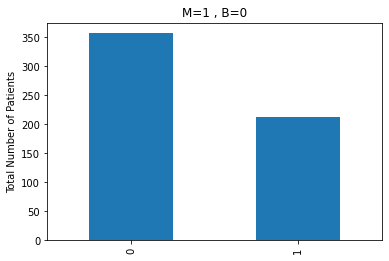

In [6]:
#CHECKING FOR CLASS IMBALANCE

from sklearn import preprocessing

imbalance = dict(breast_cancer['diagnosis'].value_counts())
print(imbalance)

print(breast_cancer['diagnosis'])
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
datas = pd.DataFrame(preprocessing.scale(breast_cancer.iloc[:,1:32]))
datas.columns = list(breast_cancer.iloc[:,1:32].columns)
datas['diagnosis'] = breast_cancer['diagnosis']

datas.diagnosis.value_counts().plot(kind='bar')
plotting.title("M=1 , B=0")
plotting.ylabel("Total Number of Patients")


<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

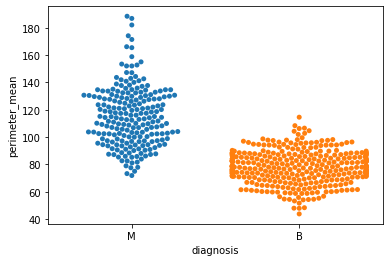

In [7]:
sns.swarmplot(y='perimeter_mean',x='diagnosis', data=data_mean)

The histograms of the attributes are given below:


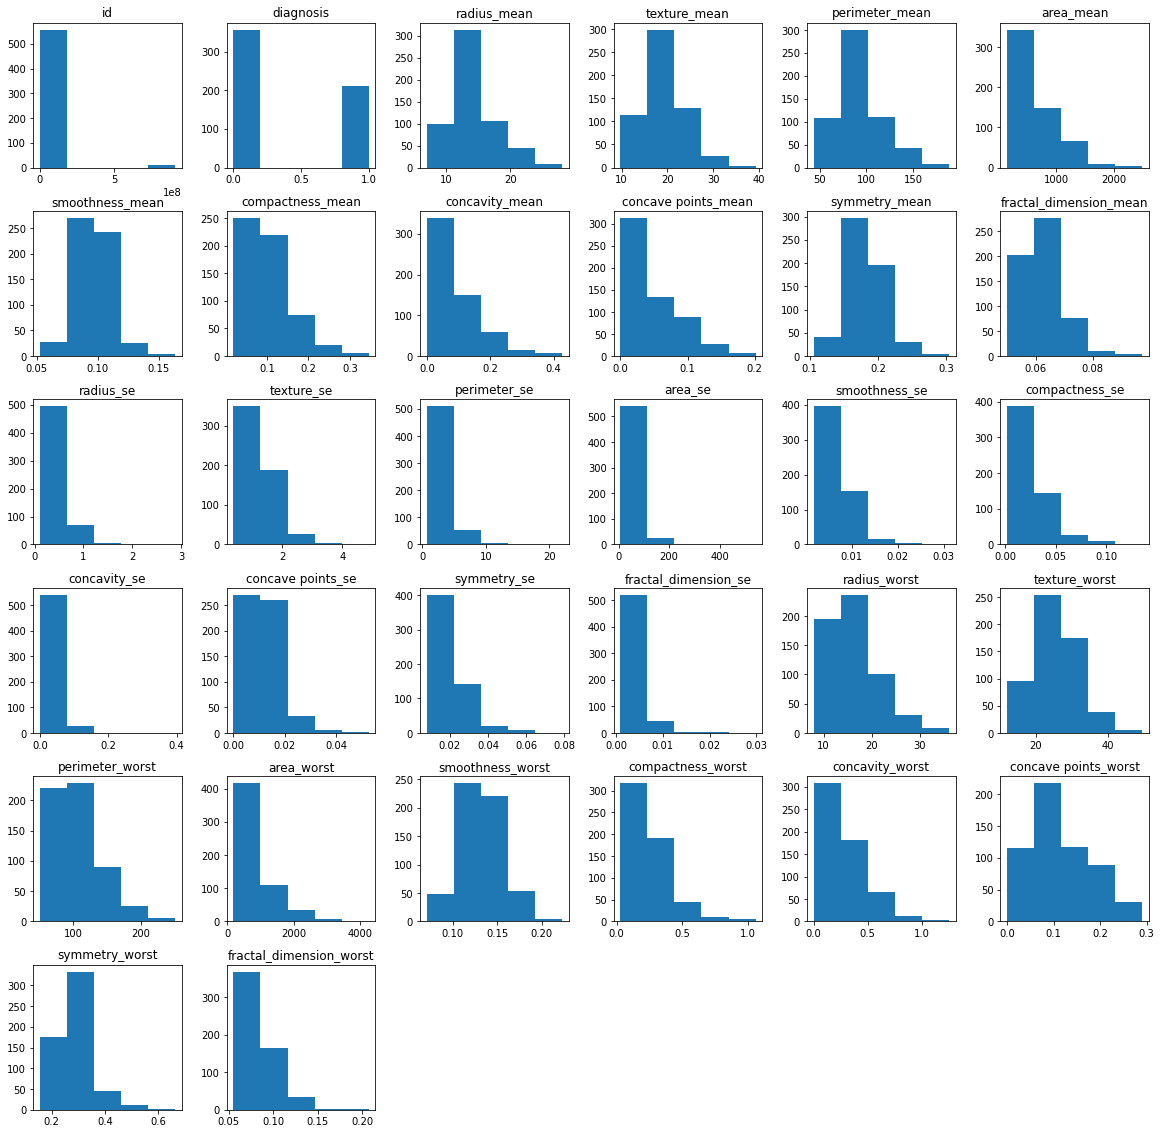

In [8]:
#CHECKING FOR NORMALISATION

print("The histograms of the attributes are given below:")
breast_cancer.hist(bins=5,grid=False,layout=[6,6],figsize=[20,20])
plotting.show()
print("\n")

The correlation heatmap is shown below:


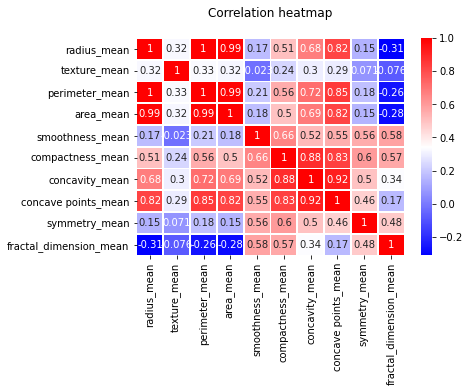

In [9]:
#CHECKING FOR CORRELATION

print("The correlation heatmap is shown below:")
b = breast_cancer
b_corr = b.drop(['id','diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
                 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'],axis=1)
correlation = b_corr.corr()
heatmap = sns.heatmap(correlation, cbar=True, annot=True, cmap="bwr", linewidths=.75)
heatmap.set_title("Correlation heatmap\n")
plotting.show()
print("\n")

In [10]:
#BEFORE FEATURE SCALING

breast_cancer = breast_cancer.drop(['id'],axis=1)
headers = breast_cancer.columns
minimum = list(map(lambda x: round(x,4),breast_cancer.min()))
mean = list(map(lambda x: round(x,4),breast_cancer.mean()))
maximum = list(map(lambda x: round(x,4),breast_cancer.max()))
std =list(map(lambda x: round(x,4),breast_cancer.std()))

before_scaling=[]
before_scaling.append(['Feature','Min','Mean','Max','Std. Dev'])
for i in range(len(headers)):
    before_scaling.append([headers[i],minimum[i],mean[i],maximum[i],std[i]])

table1 = Texttable()
table1.add_rows(before_scaling)
print(table1.draw())
print("\n")


+-------------------------+---------+---------+---------+----------+
|         Feature         |   Min   |  Mean   |   Max   | Std. Dev |
+=========================+=========+=========+=========+==========+
| diagnosis               | 0       | 0.373   | 1       | 0.484    |
+-------------------------+---------+---------+---------+----------+
| radius_mean             | 6.981   | 14.127  | 28.110  | 3.524    |
+-------------------------+---------+---------+---------+----------+
| texture_mean            | 9.710   | 19.290  | 39.280  | 4.301    |
+-------------------------+---------+---------+---------+----------+
| perimeter_mean          | 43.790  | 91.969  | 188.500 | 24.299   |
+-------------------------+---------+---------+---------+----------+
| area_mean               | 143.500 | 654.889 | 2501    | 351.914  |
+-------------------------+---------+---------+---------+----------+
| smoothness_mean         | 0.053   | 0.096   | 0.163   | 0.014    |
+-------------------------+-------

In [11]:
#AFTER FEATURE SCALING

breast_cancer = pd.DataFrame(preprocessing.scale(breast_cancer.iloc[:,0:32]))

minimum = list(map(lambda x: round(x,4),breast_cancer.min()))
mean = list(map(lambda x: round(x,4),breast_cancer.mean()))
maximum = list(map(lambda x: round(x,4),breast_cancer.max()))
std =list(map(lambda x: round(x,4),breast_cancer.std()))

after_scaling=[]
after_scaling.append(['Feature','Min','Mean','Max','Std. Dev'])
for i in range(len(headers)):
    after_scaling.append([headers[i],minimum[i],mean[i],maximum[i],std[i]])

table2 = Texttable()
table2.add_rows(after_scaling)
print(table2.draw())
print("\n")

+-------------------------+--------+------+--------+----------+
|         Feature         |  Min   | Mean |  Max   | Std. Dev |
+=========================+========+======+========+==========+
| diagnosis               | -0.771 | 0    | 1.298  | 1.001    |
+-------------------------+--------+------+--------+----------+
| radius_mean             | -2.030 | 0    | 3.971  | 1.001    |
+-------------------------+--------+------+--------+----------+
| texture_mean            | -2.229 | 0    | 4.652  | 1.001    |
+-------------------------+--------+------+--------+----------+
| perimeter_mean          | -1.984 | 0    | 3.976  | 1.001    |
+-------------------------+--------+------+--------+----------+
| area_mean               | -1.454 | 0    | 5.250  | 1.001    |
+-------------------------+--------+------+--------+----------+
| smoothness_mean         | -3.112 | 0    | 4.771  | 1.001    |
+-------------------------+--------+------+--------+----------+
| compactness_mean        | -1.610 | 0  

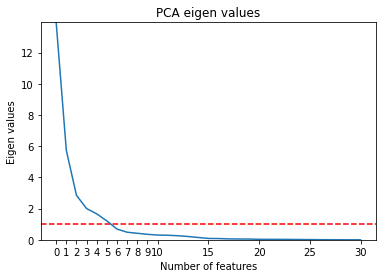

In [12]:
#PRINCIPAL COMPONENT ANALYSIS
pca = PCA(n_components=len(breast_cancer.columns))
pca.fit_transform(breast_cancer)
eigen_values = pca.explained_variance_
ratio_values = pca.explained_variance_ratio_
plotting.ylabel("Eigen values")
plotting.xlabel("Number of features")
plotting.title("PCA eigen values")
plotting.ylim(0, max(eigen_values))
plotting.xticks([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30])
plotting.style.context('seaborn-whitegrid')
plotting.axhline(y=1,color='r',linestyle='--')
plotting.plot(eigen_values)
plotting.show()
print("\n")


In [13]:

tableList=[]
tableList.append(["NC","SP","EV","CEV"])
for i in range(len(eigen_values)):
    total=0
    for j in range(i+1):
        total+=ratio_values[j]
    tableList.append([i+1,round(eigen_values[i],2),round(ratio_values[i],2),round(total*100,2)])

table3 = Texttable()
table3.add_rows(tableList)
print(table3.draw())
print("\n")

+----+--------+-------+--------+
| NC |   SP   |  EV   |  CEV   |
+====+========+=======+========+
| 1  | 13.940 | 0.450 | 44.900 |
+----+--------+-------+--------+
| 2  | 5.740  | 0.180 | 63.370 |
+----+--------+-------+--------+
| 3  | 2.850  | 0.090 | 72.550 |
+----+--------+-------+--------+
| 4  | 2      | 0.060 | 79     |
+----+--------+-------+--------+
| 5  | 1.660  | 0.050 | 84.350 |
+----+--------+-------+--------+
| 6  | 1.210  | 0.040 | 88.240 |
+----+--------+-------+--------+
| 7  | 0.690  | 0.020 | 90.450 |
+----+--------+-------+--------+
| 8  | 0.490  | 0.020 | 92.020 |
+----+--------+-------+--------+
| 9  | 0.420  | 0.010 | 93.360 |
+----+--------+-------+--------+
| 10 | 0.350  | 0.010 | 94.490 |
+----+--------+-------+--------+
| 11 | 0.310  | 0.010 | 95.480 |
+----+--------+-------+--------+
| 12 | 0.290  | 0.010 | 96.420 |
+----+--------+-------+--------+
| 13 | 0.260  | 0.010 | 97.260 |
+----+--------+-------+--------+
| 14 | 0.210  | 0.010 | 97.940 |
+----+----

In [14]:
#SPLITTING DATASET FOR TRANINING AND SPLITTING

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('Original Data Set',breast_cancer.shape)
print('Shape of training set : %i || Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )

Original Data Set (569, 31)
Shape of training set : 455 || Shape of test set : 114


In [15]:
#RANDOM FOREST AFTER NORMALIZATION AND PCA

rf = RandomForestClassifier()
sc = cross_val_score(rf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()
print("Random forest Accuracy After Norm and PCA- %s"%round(sc*100,2))

Random forest Accuracy After Norm and PCA- 94.52


In [16]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
sc = cross_val_score(knn, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

print("KNN Accuracy after Norm and PCA :- %s" % round(sc*100,2))

KNN Accuracy after Norm and PCA :- 88.37


In [17]:
#SVM TUNING

from sklearn import svm

svm = svm.SVC()
sc = cross_val_score(svm, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

print("SVM Tuning Accuracy :- %s" % round(sc*100,2))

SVM Tuning Accuracy :- 86.83


In [18]:
#LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
sc = cross_val_score(lr, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

print("Logistic regression accuracy :- %s" % round(sc*100,2))


Logistic regression accuracy :- 91.0


In [19]:
#STOCHASTIC GRADIENT DESCENT

from sklearn.linear_model import SGDClassifier

kll= SGDClassifier()
scores = cross_val_score(kll, X_train, Y_train, scoring='accuracy' ,cv=10).mean()
print("Stochastic gradient descent Accuracy :- %s" % round(scores*100,2))
print("")

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipl = make_pipeline(StandardScaler(), SGDClassifier())
pipl.fit(X_train, Y_train)
print(pipl.predict(X_test))

Stochastic gradient descent Accuracy :- 76.45

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M'
 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'B']


In [20]:
#PERCEPTRON

from sklearn.linear_model import Perceptron

pct = Perceptron()
sc = cross_val_score(pct, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

print("Perceptron Accuracy :- %s" % round(sc*100,2))

Perceptron Accuracy :- 75.35


In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
#XGBOOST
'''
import xgboost as XGBClassifier
xxx = XGBClassifier()

xx.fit(X_train, Y_train)
y_pred = xx.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Xboost Accuracy-: %.2f%%" % (accuracy * 100.0))
'''

'\nimport xgboost as XGBClassifier\nxxx = XGBClassifier()\n\nxx.fit(X_train, Y_train)\ny_pred = xx.predict(X_test)\npredictions = [round(value) for value in y_pred]\n\naccuracy = accuracy_score(y_test, predictions)\nprint("Xboost Accuracy-: %.2f%%" % (accuracy * 100.0))\n'

In [23]:
#ADABOOST

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, Y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
print(clf.predict(X_test))
print("AdaBoost Accuracy :- %s" % round(clf.score(X_train, Y_train)*100,2))

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'B']
AdaBoost Accuracy :- 100.0


In [24]:
#EXTREMELY RANDOMIZED TREES

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, Y_train)
ExtraTreesClassifier(n_estimators=100, random_state=0)
print(clf.predict(X_test))
print("Extremely Randomized trees Accuracy :- %s" % round(clf.score(X_train, Y_train)*100,2))


['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'M']
Extremely Randomized trees Accuracy :- 100.0
